In [8]:
import pandas as pd
import gensim
import utils
from importlib import reload
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import collections

In [2]:
catalog = pd.read_csv("Catalog.csv", index_col = 0)

C:\Users\Sergey\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
catalog.head(5)

,doc_id,p100a,p245a,p260a,p260b,p260c,p490a,p650a,p084a,p521a
0,1,Устинова Татьяна Витальевна,Призрак Канта,Москва,Эксмо,2018,Татьяна Устинова. Первая среди лучших,Художественная литература ; Российский детектив,84(2Рос)6,16+
1,2,NaN,Наука и жизнь,Москва,АНО Редакция журнала «Наука и жизнь»,1938-,NaN,Наука. Науковедение,72,12+
2,3,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+
3,4,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+
4,5,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+


In [4]:
import zipfile
#model_url = 'http://vectors.nlpl.eu/repository/20/184.zip'
#m = wget.download(model_url)
model_file = "180.zip"#model_url.split('/')[-1]
with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

In [5]:
def compose_embedd_vector(words):
    wds = [model[wd] for wd in words if wd in model]
    if len(wds) == 0: return None
    min_vec = np.min(wds, axis=0)
    max_vec = np.max(wds, axis=0)
    return np.concatenate((min_vec, max_vec))

In [6]:
def match_age_cat(age):
    if type(age) == float:
        return [0, 0, 0, 0, 1]
    if '0+' in age: #<6
        return [1, 1, 1, 1, 1]
    elif '6+' in age: #6-12
        return [0, 1, 1, 1, 1]
    elif '12+' in age:#12-16
        return [0, 0, 1, 1, 1]
    elif '16+' in age: #16-18
        return [0, 0, 0, 1, 1]
    else: #>18
        return [0, 0, 0, 0, 1]

In [9]:
vectors = []
lst = list(set(catalog.p650a))[1:]
strs = []

x = catalog.loc[:, ['p650a', 'p521a']].groupby(['p650a']).agg({'p521a':lambda x: {a:b for a,b in collections.Counter(x).items() if type(a) == str} })
x.p521a = [max(y, key = y.get) if len(y) > 0 else '16+' for y in x.p521a]
cat_age = {a:match_age_cat(b) for a,b in zip(x.index.values, x.p521a.values)}


for i, phrase in enumerate(lst):
    if i % 100 == 0: print(i)
    res, txt = utils.tag_mystem(phrase)
    tmp = compose_embedd_vector(res)
    if tmp is None: continue
    vectors.append(np.concatenate([tmp, cat_age[phrase]]))
    strs.append(txt)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100


In [ ]:
vectors[0].shape

In [13]:
X = np.array(vectors)
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(7059, 2)

151 Технологии и средства программирования  Библиографические ресурсы
491  Оперный театр
722 Психиатрия. Наркология  Психотерапия, трудотерапия
888 Точные и естественные науки. Науки о Земле  Транспорт
1227  Российская проза, сборники разных жанров для детей и юношества
1251 Химические науки  Химические технологии и производства. Биотехнологии
1265 Археология
1410 Издания универсального содержания  Инструментальные произведения
1510 Семьи языков  Русский язык
1551  Ботаника
1594 Полеводство
1713 Музейное дело. Музееведение  История России
1786 Общественные движения и организации  Общие вопросы литературоведения
1987  Российская фантастика 
2269  Мировой фольклор 
2290 Микробиология  Физическая химия. Химическая физика
2304 Зарубежная проза 
3024 История и критика мировой литературы  Психология развития и возрастная психология
3109 История России  Декоративно-прикладное искусство
3615 Спортивные игры  Физическая культура и спорт. Туризм
3654 Английский язык 
3703  Технология общественно

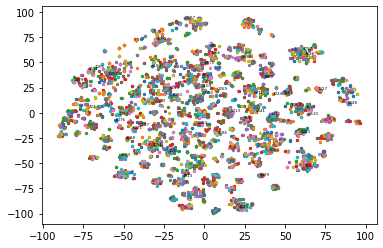

In [14]:
for i in range(X_embedded.shape[0]):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], s = 5)
    
    if np.random.rand() < 0.01:
        plt.text(X_embedded[i, 0], X_embedded[i, 1]+.03, str(i), fontsize=4)
        print(i, strs[i])

#plt.figure(figsize = (5, 6))
plt.savefig('emb.png', dpi = 400)

In [15]:
from sklearn.cluster import DBSCAN

In [48]:
db = DBSCAN(eps = 3.5, min_samples = 10).fit(X_embedded)

In [49]:
core_samples = db.core_sample_indices_
labels = db.labels_

In [50]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

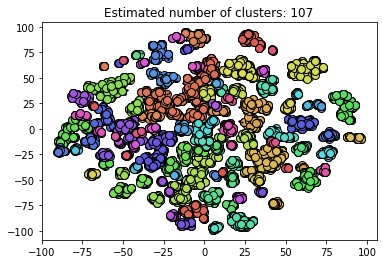

In [53]:
import pylab as pl
from itertools import cycle

pl.close('all')
pl.figure(1)
pl.clf()

# Black removed and is used for noise instead.
colors = cycle('bgrcmybgrcmybgrcmybgrcmy')
for k, col in zip(set(labels), palette):
    if k == -1:
        # Black used for noise.
        col = 'k'
        markersize = 6
    class_members = [index[0] for index in np.argwhere(labels == k)]
    cluster_core_samples = [index for index in core_samples
                            if labels[index] == k]
    for index in class_members:
        x = X_embedded[index]
        if index in core_samples and k != -1:
            markersize = 8
        else:
            markersize = 1
        pl.plot(x[0], x[1], 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=markersize)

pl.title('Estimated number of clusters: %d' % n_clusters_)
plt.savefig('dbscan.png', dpi = 400)

In [26]:
labels.shape

(7059,)

In [95]:
cluster_core_samples = [index for index in core_samples if labels[index] == 50]

In [71]:
from sklearn.cluster import KMeans

In [101]:
kmeans = KMeans(n_clusters=150, random_state=0).fit(X)
kmeans.labels_

array([ 28,   7,  44, ..., 133,  21,  21])

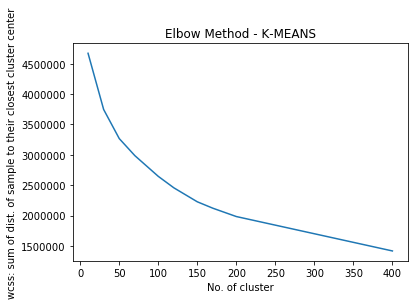

In [113]:
from sklearn.cluster import KMeans



wcss=[]
for i in [10,30,50,70,100, 120, 150, 170, 200, 400]:
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot([10,30,50,70,100, 120, 150, 170, 200, 400],wcss)
plt.title('Elbow Method - K-MEANS')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )
plt.savefig('elbow.png', dpi = 400)

# Pickle Embedding

In [ ]:
kmeans.labels_

In [ ]:
reload(utils)

In [10]:
with open("raw_embedding.pickle","wb") as pickle_out:
    pickle.dump(vectors, pickle_out)

In [11]:
with open("raw_strings.pickle","wb") as pickle_out:
    pickle.dump(strs, pickle_out)

In [ ]:
with open("cluster_embedding.pickle","rb") as pickle_in:
    #pickle.dump(vectors, pickle_out)
    v2 = pickle.load(pickle_in)

In [ ]:
len(v2)

In [ ]:
v2[0].shape

In [12]:
len(vectors)

7059

In [52]:
palette = np.array(sns.color_palette("hls", 107))

In [34]:
import seaborn as sns

In [36]:
palette

array([[0.86      , 0.3712    , 0.34      ],
       [0.86      , 0.42593684, 0.34      ],
       [0.86      , 0.48067368, 0.34      ],
       [0.86      , 0.53541053, 0.34      ],
       [0.86      , 0.59014737, 0.34      ],
       [0.86      , 0.64488421, 0.34      ],
       [0.86      , 0.69962105, 0.34      ],
       [0.86      , 0.75435789, 0.34      ],
       [0.86      , 0.80909474, 0.34      ],
       [0.85616842, 0.86      , 0.34      ],
       [0.80143158, 0.86      , 0.34      ],
       [0.74669474, 0.86      , 0.34      ],
       [0.69195789, 0.86      , 0.34      ],
       [0.63722105, 0.86      , 0.34      ],
       [0.58248421, 0.86      , 0.34      ],
       [0.52774737, 0.86      , 0.34      ],
       [0.47301053, 0.86      , 0.34      ],
       [0.41827368, 0.86      , 0.34      ],
       [0.36353684, 0.86      , 0.34      ],
       [0.34      , 0.86      , 0.3712    ],
       [0.34      , 0.86      , 0.42593684],
       [0.34      , 0.86      , 0.48067368],
       [0.

In [ ]:
with open("raw_embedding.pickle","rb") as pickle_in:
    books_cat_embedding = pickle.load(pickle_in)
    
with open("raw_strings.pickle","rb") as pickle_in:
    categories = pickle.load(pickle_in)
    
cat_to_vec = {x:y for x,y in zip(categories, books_cat_embedding)}